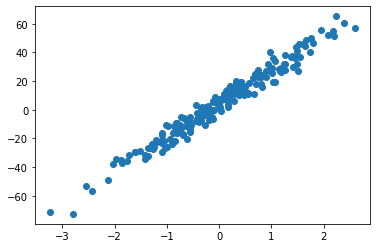

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=1, 
                       bias=5.0, noise=5.0, random_state=123)
y = np.expand_dims(y, axis=1)

plt.scatter(X, y)
plt.show()

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=123)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 1) (160, 1)
(40, 1) (40, 1)


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, utils

In [4]:
model = keras.Sequential()
model.add(layers.Dense(1, activation='linear', input_shape=(1,)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


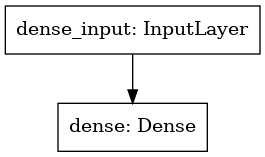

In [5]:
utils.plot_model(model)

In [6]:
optimizer = optimizers.SGD()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
history = model.fit(x_train, y_train, epochs=40)

Epoch 1/40
5/5 [==============================] - 1s 3ms/step - loss: 648.7851 - mae: 20.4189 - mse: 648.7851
Epoch 2/40
5/5 [==============================] - 0s 2ms/step - loss: 520.8685 - mae: 18.2787 - mse: 520.8685
Epoch 3/40
5/5 [==============================] - 0s 2ms/step - loss: 419.1976 - mae: 16.4343 - mse: 419.1976
Epoch 4/40
5/5 [==============================] - 0s 2ms/step - loss: 338.1555 - mae: 14.7725 - mse: 338.1555
Epoch 5/40
5/5 [==============================] - 0s 2ms/step - loss: 273.4453 - mae: 13.2652 - mse: 273.4453
Epoch 6/40
5/5 [==============================] - 0s 2ms/step - loss: 222.0671 - mae: 11.9654 - mse: 222.0671
Epoch 7/40
5/5 [==============================] - 0s 2ms/step - loss: 181.1330 - mae: 10.7991 - mse: 181.1330
Epoch 8/40
5/5 [==============================] - 0s 2ms/step - loss: 148.5867 - mae: 9.7713 - mse: 148.5867
Epoch 9/40
5/5 [==============================] - 0s 2ms/step - loss: 122.5955 - mae: 8.9017 - mse: 122.5955
Epoch 10/40


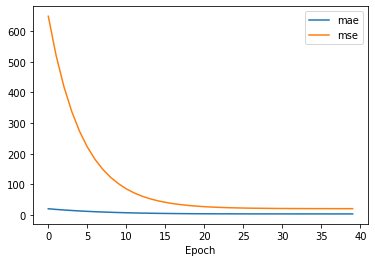

In [7]:
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.xlabel('Epoch')
plt.legend(['mae', 'mse'])
plt.show();

In [8]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 16ms/step - loss: 21.9368 - mae: 3.9892 - mse: 21.9368


[21.936803817749023, 3.989171266555786, 21.936803817749023]

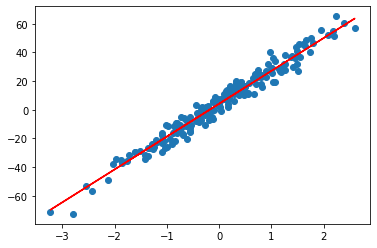

In [9]:
result = model.predict(X)

plt.scatter(X, y)
plt.plot(X, result, 'r')
plt.show()

In [10]:
model.layers

In [11]:
layer = model.layers[0]
print(layer.name)
layer = model.get_layer('dense')
print(layer.name)

dense
dense


In [12]:
weights, biases = layer.get_weights()
print(weights)
print(biases)

[[22.892912]]
[4.179406]


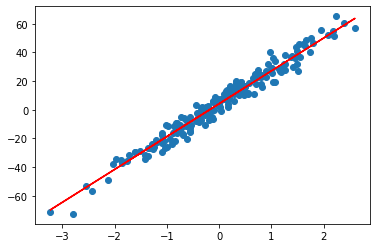

In [13]:
plt.scatter(X, y)
plt.plot(X, np.array(weights * X + biases), 'r')
plt.show()